In [1]:
import pandas as pd

# na_values Turns values into NaN
data = pd.read_csv('../Datasets/CSCS_data_anon.csv', 
                   na_values=["9999", "", " ", "Presented but no response", "NA"],
                   low_memory=False)

cols = pd.read_csv('../Datasets/var_names.csv')

empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

In [2]:
df = data[data['DATASET'] == '2022 Cohort'].copy()

In [3]:
df_happinessScale_numFriends_shy = df[['CONNECTION_social_barriers_shy', 
                                     'WELLNESS_subjective_happiness_scale_score', 
                                     'CONNECTION_social_num_close_friends', 
                                     'DATASET']].copy()

In [4]:
df_happinessScale_numFriends_shy.WELLNESS_subjective_happiness_scale_score.unique()

array([5.25, 6.  , 4.5 , 6.25, 3.25, 3.  , 4.25, 3.5 , 5.75, 5.5 , 3.75,
       2.  , 5.  , 4.75, 6.5 ,  nan, 6.75, 2.5 , 4.  , 2.25, 2.75, 7.  ,
       1.5 , 1.75, 1.25, 1.  ])

In [5]:
df_happinessScale_numFriends_shy.CONNECTION_social_num_close_friends.unique()

array([18.,  5.,  7.,  2.,  6., 17.,  4.,  1.,  0., 15.,  3., 20., 10.,
       nan, 12.,  8.,  9., 11., 14., 13.])

In [6]:
df_happinessScale_numFriends_shy.shape

(493, 4)

In [78]:
df_happinessScale_numFriends_shy.isna().sum()

CONNECTION_social_barriers_shy               0
WELLNESS_subjective_happiness_scale_score    0
CONNECTION_social_num_close_friends          0
DATASET                                      0
Happiness_Interval                           0
predicted_happiness                          0
dtype: int64

In [8]:
df_happinessScale_numFriends_shy.dropna(inplace=True)

In [9]:
df_happinessScale_numFriends_shy.isna().sum()

CONNECTION_social_barriers_shy               0
WELLNESS_subjective_happiness_scale_score    0
CONNECTION_social_num_close_friends          0
DATASET                                      0
dtype: int64

In [10]:
df_happinessScale_numFriends_shy.shape

(413, 4)

In [11]:
df_happinessScale_numFriends_shy.dtypes

CONNECTION_social_barriers_shy                object
WELLNESS_subjective_happiness_scale_score    float64
CONNECTION_social_num_close_friends          float64
DATASET                                       object
dtype: object

In [12]:
df_happinessScale_numFriends_shy.CONNECTION_social_barriers_shy.unique()

array(['Not Selected', 'I am shy'], dtype=object)

In [13]:
# df_happinessScale_numFriends_shy['CONNECTION_social_barriers_shy'] = df_happinessScale_numFriends_shy['CONNECTION_social_barriers_shy'].map({'I am shy': True, 'Not Selected': False})


In [14]:
df_happinessScale_numFriends_shy.dtypes

CONNECTION_social_barriers_shy                object
WELLNESS_subjective_happiness_scale_score    float64
CONNECTION_social_num_close_friends          float64
DATASET                                       object
dtype: object

In [15]:
df_happinessScale_numFriends_shy.describe()

,WELLNESS_subjective_happiness_scale_score,CONNECTION_social_num_close_friends
count,413.000000,413.000000
mean,4.440073,4.503632
std,1.385128,3.660085
min,1.000000,0.000000
25%,3.500000,2.000000
50%,4.500000,4.000000
75%,5.500000,5.000000
max,7.000000,20.000000


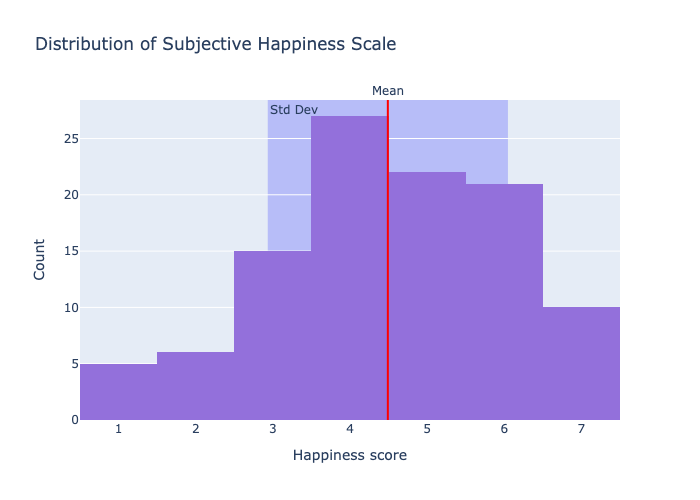

In [16]:
import plotly.express as px
import pandas as pd
import numpy as np

# Assuming df_happinessScale_numFriends is your DataFrame
# Filter and ensure data is within the correct range
df = df_happinessScale_numFriends_shy[df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score'].isin(range(1, 8))]

# Calculate mean and standard deviation
mean_value = df['WELLNESS_subjective_happiness_scale_score'].mean()
std_dev = df['WELLNESS_subjective_happiness_scale_score'].std()

# Create the histogram
fig = px.histogram(
    df,
    x='WELLNESS_subjective_happiness_scale_score',
    title='Distribution of Subjective Happiness Scale',
    labels={'WELLNESS_subjective_happiness_scale_score': 'Happiness Score'},
    color_discrete_sequence=['mediumpurple'],
    category_orders={'WELLNESS_subjective_happiness_scale_score': [1, 2, 3, 4, 5, 6, 7]},  # Ensure custom order
    barnorm='',  # Ensures it is treated as a count histogram, not normalized
    nbins=7  # Specifies the number of bins directly
)

# Customize layout to have no gaps between bins
fig.update_layout(
    xaxis_title='Happiness score',
    yaxis_title='Count',
    bargap=0.0  # Set bargap to 0 for no gaps between bars
)

# Add a vertical line for the mean
fig.add_vline(x=mean_value, line_color="red", annotation_text="Mean", annotation_position="top")

# Add a shaded rectangle for the standard deviation
fig.add_vrect(
    x0=mean_value - std_dev, x1=mean_value + std_dev,
    fillcolor="blue", opacity=0.2,
    layer="below", line_width=0,
    annotation_text="Std Dev", annotation_position="top left"
)

# Show the plot
fig.show(renderer='png')


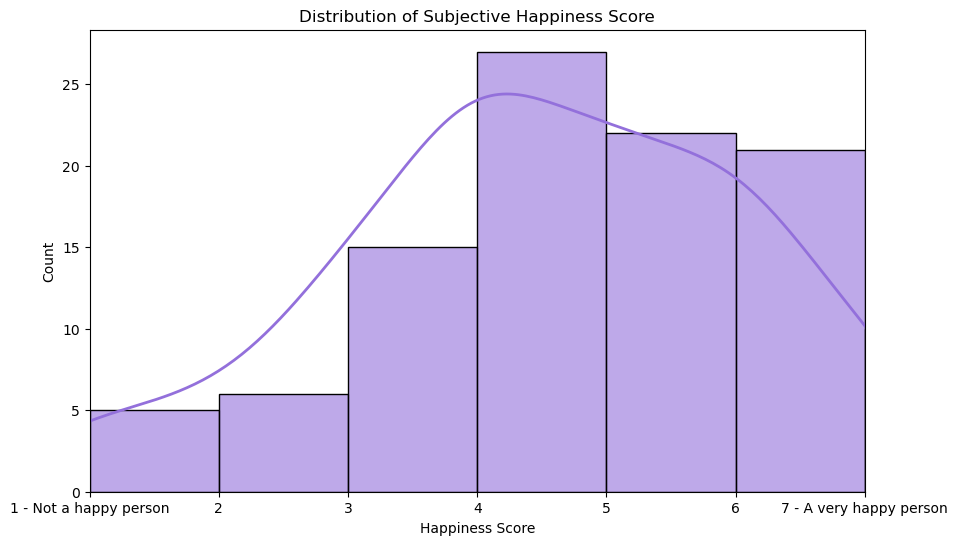

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_happinessScale_numFriends is your DataFrame
# Make sure the column contains only numeric data [1-7] for accurate plotting

# Filter the DataFrame to exclude non-numeric or out-of-scale values
df = df_happinessScale_numFriends_shy[df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score'].isin(range(1, 8))]

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Create a histogram and KDE plot
sns.histplot(df['WELLNESS_subjective_happiness_scale_score'], kde=True,
             bins=range(1, 9),  # Adjust the bins to cover from 1 to 7
             color="mediumpurple", alpha=0.6, line_kws={'linewidth': 2})

# Adding labels and title
plt.title('Distribution of Subjective Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Count')

# Customize x-ticks for clarity
plt.xticks(ticks=range(1, 8), labels=[
    '1 - Not a happy person', '2', '3', '4', '5', '6', '7 - A very happy person'])

# Set x-axis limits to ensure it only shows 1 to 7
plt.xlim(1, 7)

# Show the plot
plt.show()


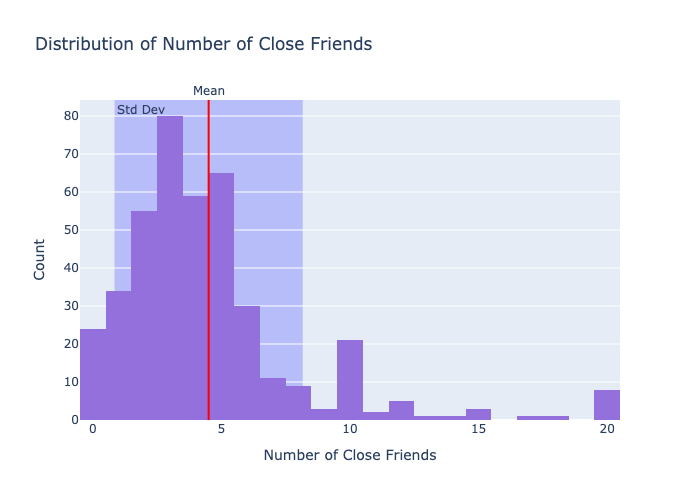

In [18]:
import plotly.express as px

# Assuming df_happinessScale_numFriends is your DataFrame
# Create the histogram
fig = px.histogram(
    df_happinessScale_numFriends_shy,
    x='CONNECTION_social_num_close_friends',
    title='Distribution of Number of Close Friends',
    labels={'CONNECTION_social_num_close_friends': 'Number of close friends'},
    color_discrete_sequence=['mediumpurple']
)

# Customize layout to have no gaps between bins
fig.update_layout(
    xaxis_title='Number of Close Friends',
    yaxis_title='Count',
    bargap=0.0  # Set bargap to 0 for no gaps between bars
)

# Calculate mean and standard deviation
mean_value = df_happinessScale_numFriends_shy['CONNECTION_social_num_close_friends'].mean()
std_dev = df_happinessScale_numFriends_shy['CONNECTION_social_num_close_friends'].std()

# Add a vertical line for the mean
fig.add_vline(x=mean_value, line_color="red", annotation_text="Mean", annotation_position="top")

# Add a shaded rectangle for the standard deviation
fig.add_vrect(
    x0=mean_value - std_dev, x1=mean_value + std_dev,
    fillcolor="blue", opacity=0.2,
    layer="below", line_width=0,
    annotation_text="Std Dev", annotation_position="top left"
)

# Show the plot
fig.show(renderer='png')


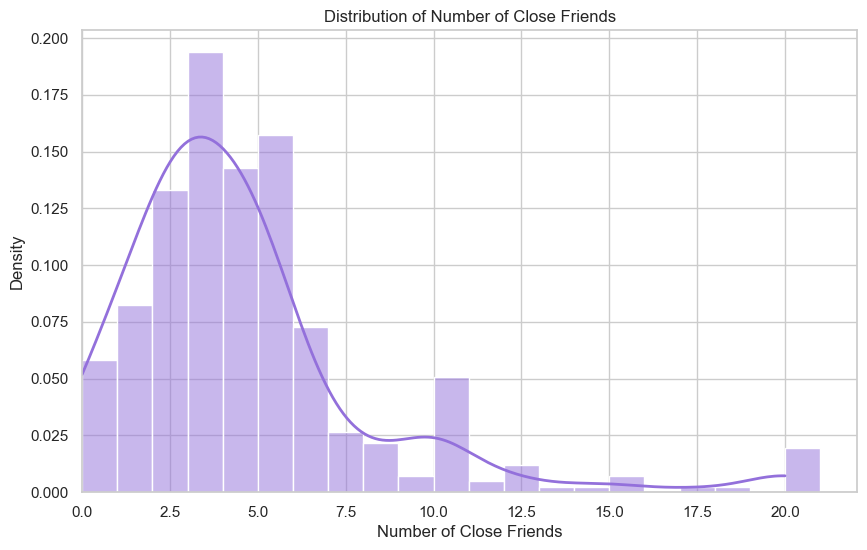

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_happinessScale_numFriends is your DataFrame and CONNECTION_social_num_close_friends is your column

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot histogram and KDE
bins = np.arange(0, df_happinessScale_numFriends_shy['CONNECTION_social_num_close_friends'].max() + 2)  # Each bin goes from n to n+1

sns.histplot(data=df_happinessScale_numFriends_shy, x='CONNECTION_social_num_close_friends', kde=True,
             color="mediumpurple", bins=bins, stat='density', line_kws={'linewidth': 2})

# Adding labels and title
plt.title('Distribution of Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Density')

# Set the x-axis to start at 0
plt.xlim(left=0)

# Show the plot
plt.show()


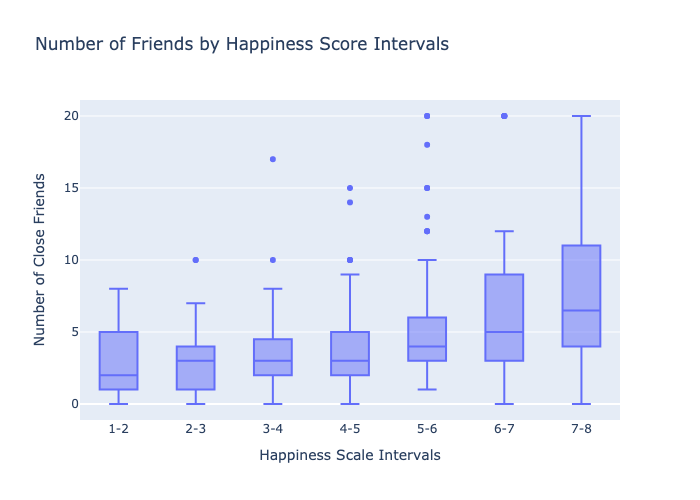

In [20]:
import pandas as pd
import plotly.express as px

# Create bins for happiness scale (0-1, 1-2, 2-3, ...)
bins = range(0, 11)  # Assuming the scale is from 0 to 10
labels = [f'{i}-{i+1}' for i in bins[:-1]]

# Bin the happiness scale into intervals
df_happinessScale_numFriends_shy['Happiness_Interval'] = pd.cut(
    df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score'],
    bins=bins,
    labels=labels,
    right=False  # Include the left edge, exclude the right
)

# Create the box plot
fig = px.box(
    df_happinessScale_numFriends_shy,
    x='Happiness_Interval',
    y='CONNECTION_social_num_close_friends',
    title='Number of Friends by Happiness Score Intervals',
    labels={
        'Happiness_Interval': 'Happiness Score Intervals',
        'CONNECTION_social_num_close_friends': 'Number of Close Friends'
    },
    category_orders={'Happiness_Interval': labels}  # Ensure intervals are ordered
)

# Customize layout
fig.update_layout(
    xaxis_title='Happiness Scale Intervals',
    yaxis_title='Number of Close Friends'
)

# Show the plot
fig.show(renderer='png')


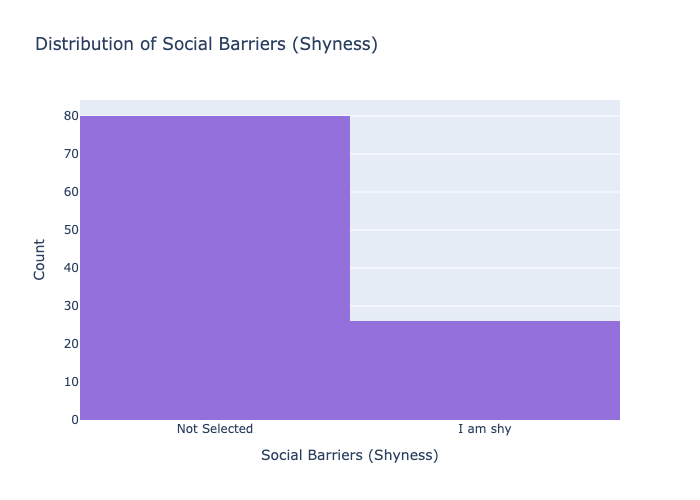

In [21]:
import plotly.express as px

# Assuming df_happinessScale_numFriends is your DataFrame
# Filter and ensure data is within the correct range
df = df_happinessScale_numFriends_shy[df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score'].isin(range(1, 8))]

# Create the histogram for the 'CONNECTION_social_barriers_shy' column
fig = px.histogram(
    df,
    x='CONNECTION_social_barriers_shy',
    title='Distribution of Social Barriers (Shyness)',
    labels={'CONNECTION_social_barriers_shy': 'Social Barriers (Shyness)'},
    color_discrete_sequence=['mediumpurple'],
    barnorm='',  # Ensures it is treated as a count histogram, not normalized
)

# Customize layout to have no gaps between bars
fig.update_layout(
    xaxis_title='Social Barriers (Shyness)',
    yaxis_title='Count',
    bargap=0.0  # Set bargap to 0 for no gaps between bars
)

# Show the plot
fig.show(renderer='png')


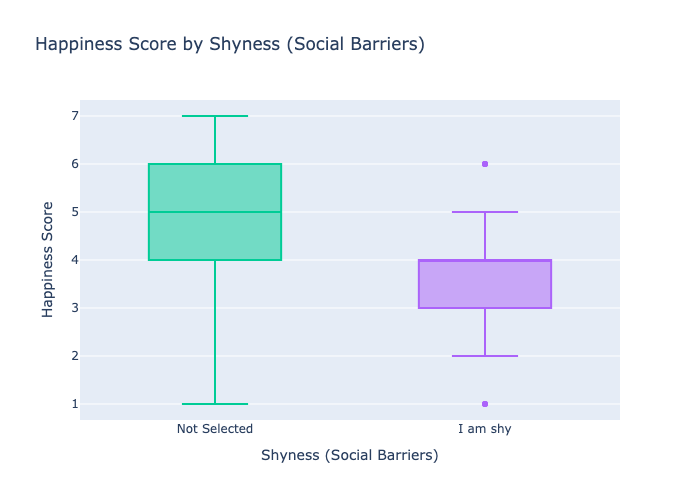

In [22]:
import plotly.express as px

# Assuming df_happinessScale_numFriends is your DataFrame
# Filter and ensure data is within the correct range
df = df_happinessScale_numFriends_shy[df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score'].isin(range(1, 8))]

# Create the box plot split by the 'CONNECTION_social_barriers_shy' variable
fig = px.box(
    df,
    x='CONNECTION_social_barriers_shy',  # Shyness variable on the x-axis
    y='WELLNESS_subjective_happiness_scale_score',  # Happiness score on the y-axis
    title='Happiness Score by Shyness (Social Barriers)',
    labels={'CONNECTION_social_barriers_shy': 'Shyness (Social Barriers)', 
            'WELLNESS_subjective_happiness_scale_happy': 'Happiness Scale'},
    color='CONNECTION_social_barriers_shy',  # Coloring by shyness group
    color_discrete_map={'Yes': 'mediumpurple', 'No': 'lightgreen'},  # Customize colors
)

# Customize layout
fig.update_layout(
    xaxis_title='Shyness (Social Barriers)',
    yaxis_title='Happiness Score',
    showlegend=False  # Disable the legend if it's not needed
)

# Show the plot
fig.show(renderer='png')


                                        OLS Regression Results                                       
Dep. Variable:     WELLNESS_subjective_happiness_scale_score   R-squared:                       0.106
Model:                                                   OLS   Adj. R-squared:                  0.104
Method:                                        Least Squares   F-statistic:                     48.96
Date:                                       Thu, 28 Nov 2024   Prob (F-statistic):           1.07e-11
Time:                                               18:34:04   Log-Likelihood:                -696.83
No. Observations:                                        413   AIC:                             1398.
Df Residuals:                                            411   BIC:                             1406.
Df Model:                                                  1                                         
Covariance Type:                                   nonrobust                      

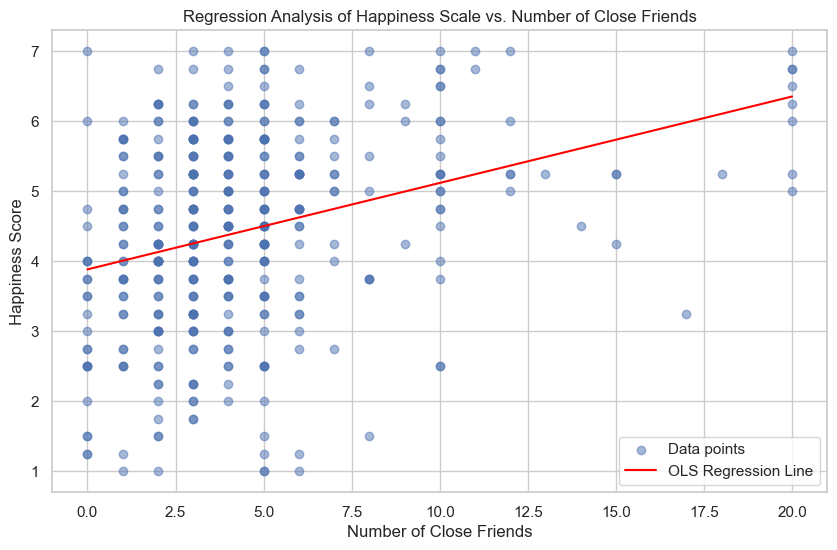

In [23]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Assuming df_happinessScale_numFriends is your DataFrame
# Preparing the data
X = df_happinessScale_numFriends_shy['CONNECTION_social_num_close_friends']  # Predictor
y = df_happinessScale_numFriends_shy['WELLNESS_subjective_happiness_scale_score']  # Response

# Adding a constant to the predictor variable, necessary for statsmodels' OLS model
X = sm.add_constant(X)

# Fit an OLS model
model = sm.OLS(y, X).fit()

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(X['CONNECTION_social_num_close_friends'], y, alpha=0.5, label='Data points')

# Generating values for the regression line
x_pred = np.linspace(X['CONNECTION_social_num_close_friends'].min(), X['CONNECTION_social_num_close_friends'].max(), 50)
x_pred2 = sm.add_constant(x_pred)  # Need to add a constant to these as well

# Predicting y values for our line
y_pred = model.predict(x_pred2)

# Plotting the regression line
plt.plot(x_pred, y_pred, color='red', label='OLS Regression Line')

# Adding labels and title
plt.title('Regression Analysis of Happiness Scale vs. Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Happiness Score')
plt.legend()

print(model.summary())

# Show the plot
plt.show()


In [25]:
import statsmodels.formula.api as smf

linear_model_specification = '''
Q('WELLNESS_subjective_happiness_scale_score') ~ 
    CONNECTION_social_num_close_friends + 
    CONNECTION_social_barriers_shy 
'''
model = smf.ols(linear_model_specification, df_happinessScale_numFriends_shy)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     Q('WELLNESS_subjective_happiness_scale_score')   R-squared:                       0.165
Model:                                                        OLS   Adj. R-squared:                  0.161
Method:                                             Least Squares   F-statistic:                     40.41
Date:                                            Thu, 28 Nov 2024   Prob (F-statistic):           9.62e-17
Time:                                                    18:34:04   Log-Likelihood:                -682.92
No. Observations:                                             413   AIC:                             1372.
Df Residuals:                                                 410   BIC:                             1384.
Df Model:                                                       2                                         
Covariance Type:                                        nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          3.3537      0.140     23.916      0.000       3.078       3.629
CONNECTION_social_barriers_shy[T.Not Selected]     0.7817      0.146      5.345      0.000       0.494       1.069
CONNECTION_social_num_close_friends                0.1105      0.017      6.407      0.000       0.077       0.144
==============================================================================
Omnibus:                        7.231   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.406
Skew:                          -0.314   Prob(JB):                       0.0246
Kurtosis:                       2.807   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

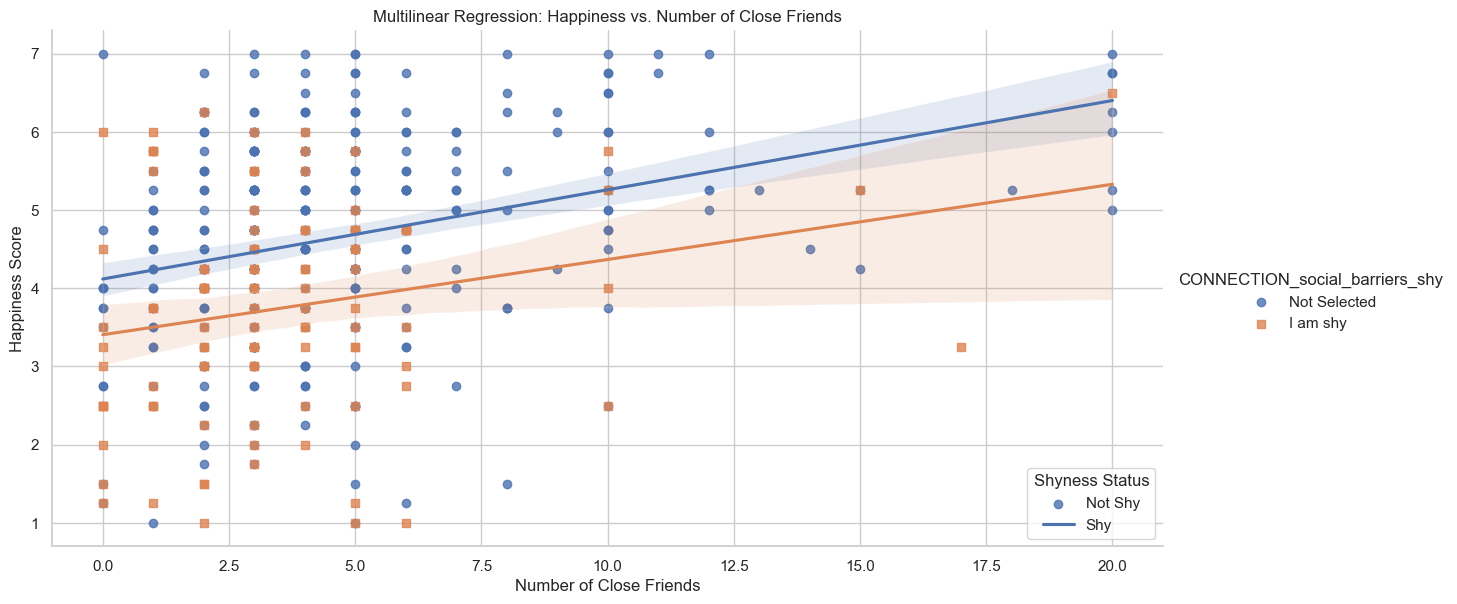

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a new column for predicted values based on the model
df_happinessScale_numFriends_shy['predicted_happiness'] = model_fit.predict(df_happinessScale_numFriends_shy)

# Plot the relationship between actual and predicted happiness, based on number of close friends
sns.lmplot(
    data=df_happinessScale_numFriends_shy,
    x='CONNECTION_social_num_close_friends',
    y='WELLNESS_subjective_happiness_scale_score',
    hue='CONNECTION_social_barriers_shy',  # This will color the lines based on 'shy' status
    markers=['o', 's'],
    aspect=2, height=6
)

# Customize the plot
plt.title('Multilinear Regression: Happiness vs. Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Happiness Score')

# Adjust the legend to make it clear which line is shy and which is not shy
plt.legend(title='Shyness Status', labels=['Not Shy', 'Shy'])

plt.show()
